In [1]:
# Import packages

import pandas as pd 
import numpy as np 
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import plotly.express as px

import xgboost as xgb

from joblib import dump, load

pd.set_option('display.max_columns', None)

C:\Users\imacd_0odruq3\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
base = pd.read_csv('../data/adjusted_stats_over_under_modeling_base_df.csv')
model = load('../modeling/over_under_modeling/saved_models/ou_logistic_regression_av.joblib')
feature_list = ['qb_adjusted_value_home', 'rushing_adjusted_value_home', 'qb_def_adjusted_value_home', 'rush_def_adjusted_value_home', 'special_teams_value_home',
                   'qb_adjusted_value_away', 'rushing_adjusted_value_away', 'qb_def_adjusted_value_away', 'rush_def_adjusted_value_away', 'special_teams_value_away',
               'total_score_line']

In [3]:
# Get predictions and probabilites

base = base.dropna()
features = base[feature_list].to_numpy()

# Get win predictions/probabilities

win_preds = model.predict(features)
win_probs = model.predict_proba(features)

In [4]:
base['over_hits_pred'] = win_preds
base['over_hits_prob'] = win_probs[:,1]
base['under_hits_prob'] = win_probs[:,0]

In [5]:
base

Unnamed: 0        date  season  week season_type                  home  \
32            32  2014-09-21    2014     3         REG  New England Patriots   
35            35  2014-09-21    2014     3         REG      Cleveland Browns   
36            36  2014-09-21    2014     3         REG     Carolina Panthers   
37            37  2014-09-21    2014     3         REG     Arizona Cardinals   
38            38  2014-09-21    2014     3         REG         Buffalo Bills   
...          ...         ...     ...   ...         ...                   ...   
2371        2401  2023-01-21    2022    20        POST   Philadelphia Eagles   
2372        2402  2023-01-22    2022    20        POST         Buffalo Bills   
2373        2403  2023-01-22    2022    20        POST   San Francisco 49ers   
2375        2405  2023-01-29    2022    21        POST    Kansas City Chiefs   
2376        2406  2023-02-12    2022    22        POST   Philadelphia Eagles   

                      away  home_score_x  away_score_x          home_qb  \
32       Las Vegas Raiders            16             9        Tom Brady   
35        Baltimore Ravens            21            23      Brian Hoyer   
36     Pittsburgh Steelers            19            37       Cam Newton   
37     San Francisco 49ers            23            14     Drew Stanton   
38    Los Angeles Chargers            10            22        EJ Manuel   
...                    ...           ...           ...              ...   
2371       New York Giants            38             7      Jalen Hurts   
2372    Cincinnati Bengals            10            27       Josh Allen   
2373        Dallas Cowboys            19            12      Brock Purdy   
2375    Cincinnati Bengals            23            20  Patrick Mahomes   
2376    Kansas City Chiefs            35            38      Jalen Hurts   

                 away_qb  qb_adjusted_value_home  rushing_adjusted_value_home  \
32            Derek Carr                0.456221                    -0.500777   
35            Joe Flacco               -0.688197                     0.124970   
36    Ben Roethlisberger                0.767364                    -0.738487   
37      Colin Kaepernick               -1.157754                     0.332257   
38         Philip Rivers                0.603547                    -2.148207   
...                  ...                     ...                          ...   
2371        Daniel Jones                0.690447                     1.920561   
2372          Joe Burrow                0.285539                     0.625543   
2373        Dak Prescott                0.764975                     0.633274   
2375          Joe Burrow                0.626274                     0.390027   
2376     Patrick Mahomes                0.579982                     1.844241   

      qb_rushing_value_pct_home  qb_def_adjusted_value_home  \
32                          0.0                    2.010295   
35                          0.0                    0.660149   
36                          0.0                    0.730025   
37                          0.0                   -0.737241   
38                          0.0                    1.100186   
...                         ...                         ...   
2371                        0.0                    0.348960   
2372                        0.0                    0.660321   
2373                        0.0                    0.686924   
2375                        0.0                    0.641969   
2376                        0.0                    0.614928   

      rush_def_adjusted_value_home  special_teams_value_home  \
32                        0.231263                  0.937560   
35                       -1.343275                 -0.273793   
36                        0.510499                  0.963767   
37                        0.919733                  0.811753   
38                        1.118419                  1.432238   
...                           

In [6]:
# Set what part of the data to analyze
# Most models will just look at the test set (2022 for now)
# For models with very low overfitting, could be fruitful to look at the results on the entire data set though

# analysis_df = base[base.season != 2022]
analysis_df = base[base.season == 2022]
analysis_df['pred_correct'] = analysis_df.apply(lambda x: 1 if x.over_hits == x.over_hits_pred else 0, axis=1)
analysis_df.head()

<ipython-input-6-8236d72f6f54>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['pred_correct'] = analysis_df.apply(lambda x: 1 if x.over_hits == x.over_hits_pred else 0, axis=1)


Unnamed: 0        date  season  week season_type              home  \
2097        2124  2022-09-08    2022     1         REG  Los Angeles Rams   
2098        2125  2022-09-11    2022     1         REG    Miami Dolphins   
2101        2128  2022-09-11    2022     1         REG     New York Jets   
2104        2131  2022-09-11    2022     1         REG     Detroit Lions   
2105        2132  2022-09-11    2022     1         REG     Chicago Bears   

                      away  home_score_x  away_score_x           home_qb  \
2097         Buffalo Bills            10            31  Matthew Stafford   
2098  New England Patriots            20             7    Tua Tagovailoa   
2101      Baltimore Ravens             9            24        Joe Flacco   
2104   Philadelphia Eagles            35            38        Jared Goff   
2105   San Francisco 49ers            19            10     Justin Fields   

            away_qb  qb_adjusted_value_home  rushing_adjusted_value_home  \
2097     Josh Allen                0.846672                    -1.526921   
2098      Mac Jones               -0.247191                    -0.441563   
2101  Lamar Jackson               -0.427333                    -0.134352   
2104    Jalen Hurts               -0.156866                    -0.552323   
2105     Trey Lance               -0.562550                     0.274953   

      qb_rushing_value_pct_home  qb_def_adjusted_value_home  \
2097                        0.0                    0.659332   
2098                        0.0                    0.815666   
2101                        0.0                   -0.622903   
2104                        0.0                   -0.068564   
2105                        0.0                    0.275204   

      rush_def_adjusted_value_home  special_teams_value_home  \
2097                      0.013114                  0.062338   
2098                     -0.619903                 -0.147288   
2101                     -0.379120                  0.396428   
2104                     -0.823399                  0.029035   
2105                     -0.295882                  0.651611   

      qb_adjusted_value_away  rushing_adjusted_value_away  \
2097                1.331436                     1.477956   
2098                0.347370                     0.498576   
2101               -0.429986                     0.776442   
2104               -0.047993                     0.462513   
2105               -0.251743                    -0.857999   

      qb_rushing_value_pct_away  qb_def_adjusted_value_away  \
2097                        0.0                    0.389701   
2098                        0.0                   -0.329891   
2101                        0.0                   -0.947986   
2104                        0.0                   -0.128524   
2105                        0.0                    0.118070   

      rush_def_adjusted_value_away  special_teams_value_away  \
2097                     -0.461327                 -0.118813   
2098                     -1.202476                  0.166116   
2101                      0.157411                  0.776423   
2104                     -0.307588                 -0.223404   
2105                      0.615457                  0.262438   

             home_team             away_team  home_score_y  away_score_y  \
2097  Los Angeles Rams         Buffalo Bills            10            31   
2098    Miami Dolphins  New England Patriots            20             7   
2101     New York Jets      Baltimore Ravens             9            24   
2104     Detroit Lions   Philadelphia Eagles            35            38   
2105     Chicago Bears   San Francisco 49ers            19            10   

      total_score_actual  home_moneyline  away_moneyline  home_spread  \
2097                  41           110.0          -132.0          2.0   
2098                  27          -172.0           150.0         -3.0   
2101                  33           240.0          -303.0        

In [7]:
# Get general accuracy measurements

accuracy = accuracy_score(analysis_df.over_hits, analysis_df.over_hits_pred)
tn, fp, fn, tp = confusion_matrix(analysis_df.over_hits, analysis_df.over_hits_pred).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print()
print('True Positive Rate: {}'.format(tp/(tp+fn)))
print('False Positive Rate: {}'.format(fp/(fp+tn)))
print('True Negative Rate: {}'.format(tn/(tn+fp)))
print('False Negative Rate: {}'.format(fn/(fn+tp)))

Accuracy: 0.525
Precision: 0.47297297297297297
Recall: 0.3181818181818182

True Positive Rate: 0.3181818181818182
False Positive Rate: 0.3
True Negative Rate: 0.7
False Negative Rate: 0.6818181818181818


In [10]:
# Get NFL translated accuracy stats

over_hits_pct = sum(analysis_df.over_hits==1)/len(analysis_df)
under_hits_pct = sum(analysis_df.over_hits==0)/len(analysis_df)

over_hits_pred_pct = sum(analysis_df.over_hits_pred==1)/len(analysis_df)
under_hits_pred_pct = sum(analysis_df.over_hits_pred==0)/len(analysis_df)

print('Over Hits Percentage: {}'.format(over_hits_pct))
print('Under Hits Percentage: {}'.format(under_hits_pct))
print('Over Hits Predicted Percentage: {}'.format(over_hits_pred_pct))
print('Under Hits Predicted Percentage: {}'.format(under_hits_pred_pct))

Over Hits Percentage: 0.4583333333333333
Under Hits Percentage: 0.5416666666666666
Over Hits Predicted Percentage: 0.30833333333333335
Under Hits Predicted Percentage: 0.6916666666666667


In [12]:
overs = analysis_df[analysis_df.over_hits==1]
unders = analysis_df[analysis_df.over_hits==0]

overs_acc = accuracy_score(overs.over_hits, overs.over_hits_pred)
unders_acc = accuracy_score(unders.over_hits, unders.over_hits_pred)

overs_pred = analysis_df[analysis_df.over_hits_pred==1]
unders_pred = analysis_df[analysis_df.over_hits_pred==0]

overs_pred_acc = accuracy_score(overs_pred.over_hits, overs_pred.over_hits_pred)
unders_pred_acc = accuracy_score(unders_pred.over_hits, unders_pred.over_hits_pred)

print('Accuracy for Over Hits: {}'.format(overs_acc))
print('Accuracy for Under Hits: {}'.format(unders_acc))
print()
print('Accuracy for Over Predicted: {}'.format(overs_pred_acc))
print('Accuracy for Unders Predicted: {}'.format(unders_pred_acc))

Accuracy for Over Hits: 0.3181818181818182
Accuracy for Under Hits: 0.7

Accuracy for Over Predicted: 0.47297297297297297
Accuracy for Unders Predicted: 0.5481927710843374


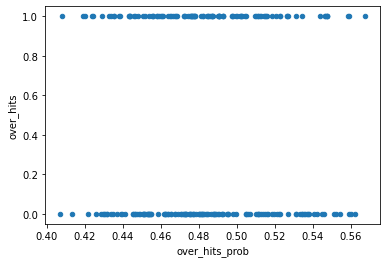

In [14]:
# Plot home win probability vs result

analysis_df.plot.scatter(x='over_hits_prob', y='over_hits')

      correct_preds  total_games  accuracy
week                                      
1                 5           10  0.500000
2                 9           14  0.642857
3                 7           16  0.437500
4                 7           12  0.583333
5                 7           15  0.466667
6                 9           13  0.692308
7                 6           13  0.461538
8                 3           12  0.250000
9                 7           11  0.636364
10                9           14  0.642857
11                6           14  0.428571
12                6           13  0.461538
13                7           12  0.583333
14                5           10  0.500000
15                8           15  0.533333
16               10           14  0.714286
17                4            9  0.444444
18                6           11  0.545455
19                3            6  0.500000
20                0            4  0.000000
21                1            1  1.000000
22         

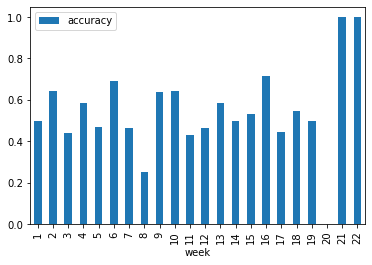

In [15]:
# Week by week accuracy

weekly = analysis_df.groupby(by='week').agg(correct_preds=('pred_correct', 'sum'), total_games=('pred_correct', 'count'))
weekly['accuracy'] = weekly.correct_preds/weekly.total_games
print(weekly)
weekly.plot.bar(y='accuracy')

In [20]:
# Average Confidence
# When correctly predicting a win, how confident were we in the prediction on average?
# Likewise, when incorrect, how confident were we?

pred_confs = analysis_df[['pred_correct', 'over_hits', 'over_hits_prob', 'under_hits_prob']].groupby(by=['pred_correct', 'over_hits']).mean()[['over_hits_prob', 'under_hits_prob']]
pred_confs

over_hits_prob  under_hits_prob
pred_correct over_hits                                 
0            0                0.529014         0.470986
             1                0.465496         0.534504
1            0                0.463924         0.536076
             1                0.523999         0.476001

In [21]:
game_with_lines = analysis_df.copy()
game_with_lines.head()

Unnamed: 0        date  season  week season_type              home  \
2097        2124  2022-09-08    2022     1         REG  Los Angeles Rams   
2098        2125  2022-09-11    2022     1         REG    Miami Dolphins   
2101        2128  2022-09-11    2022     1         REG     New York Jets   
2104        2131  2022-09-11    2022     1         REG     Detroit Lions   
2105        2132  2022-09-11    2022     1         REG     Chicago Bears   

                      away  home_score_x  away_score_x           home_qb  \
2097         Buffalo Bills            10            31  Matthew Stafford   
2098  New England Patriots            20             7    Tua Tagovailoa   
2101      Baltimore Ravens             9            24        Joe Flacco   
2104   Philadelphia Eagles            35            38        Jared Goff   
2105   San Francisco 49ers            19            10     Justin Fields   

            away_qb  qb_adjusted_value_home  rushing_adjusted_value_home  \
2097     Josh Allen                0.846672                    -1.526921   
2098      Mac Jones               -0.247191                    -0.441563   
2101  Lamar Jackson               -0.427333                    -0.134352   
2104    Jalen Hurts               -0.156866                    -0.552323   
2105     Trey Lance               -0.562550                     0.274953   

      qb_rushing_value_pct_home  qb_def_adjusted_value_home  \
2097                        0.0                    0.659332   
2098                        0.0                    0.815666   
2101                        0.0                   -0.622903   
2104                        0.0                   -0.068564   
2105                        0.0                    0.275204   

      rush_def_adjusted_value_home  special_teams_value_home  \
2097                      0.013114                  0.062338   
2098                     -0.619903                 -0.147288   
2101                     -0.379120                  0.396428   
2104                     -0.823399                  0.029035   
2105                     -0.295882                  0.651611   

      qb_adjusted_value_away  rushing_adjusted_value_away  \
2097                1.331436                     1.477956   
2098                0.347370                     0.498576   
2101               -0.429986                     0.776442   
2104               -0.047993                     0.462513   
2105               -0.251743                    -0.857999   

      qb_rushing_value_pct_away  qb_def_adjusted_value_away  \
2097                        0.0                    0.389701   
2098                        0.0                   -0.329891   
2101                        0.0                   -0.947986   
2104                        0.0                   -0.128524   
2105                        0.0                    0.118070   

      rush_def_adjusted_value_away  special_teams_value_away  \
2097                     -0.461327                 -0.118813   
2098                     -1.202476                  0.166116   
2101                      0.157411                  0.776423   
2104                     -0.307588                 -0.223404   
2105                      0.615457                  0.262438   

             home_team             away_team  home_score_y  away_score_y  \
2097  Los Angeles Rams         Buffalo Bills            10            31   
2098    Miami Dolphins  New England Patriots            20             7   
2101     New York Jets      Baltimore Ravens             9            24   
2104     Detroit Lions   Philadelphia Eagles            35            38   
2105     Chicago Bears   San Francisco 49ers            19            10   

      total_score_actual  home_moneyline  away_moneyline  home_spread  \
2097                  41           110.0          -132.0          2.0   
2098                  27          -172.0           150.0         -3.0   
2101                  33           240.0          -303.0        

In [22]:
game_with_lines['over_advantage'] = game_with_lines.apply(lambda x: x.over_hits_prob-.5, axis=1)
game_with_lines['under_advantage'] = game_with_lines.apply(lambda x: x.under_hits_prob-.5, axis=1)
game_with_lines.head()

Unnamed: 0        date  season  week season_type              home  \
2097        2124  2022-09-08    2022     1         REG  Los Angeles Rams   
2098        2125  2022-09-11    2022     1         REG    Miami Dolphins   
2101        2128  2022-09-11    2022     1         REG     New York Jets   
2104        2131  2022-09-11    2022     1         REG     Detroit Lions   
2105        2132  2022-09-11    2022     1         REG     Chicago Bears   

                      away  home_score_x  away_score_x           home_qb  \
2097         Buffalo Bills            10            31  Matthew Stafford   
2098  New England Patriots            20             7    Tua Tagovailoa   
2101      Baltimore Ravens             9            24        Joe Flacco   
2104   Philadelphia Eagles            35            38        Jared Goff   
2105   San Francisco 49ers            19            10     Justin Fields   

            away_qb  qb_adjusted_value_home  rushing_adjusted_value_home  \
2097     Josh Allen                0.846672                    -1.526921   
2098      Mac Jones               -0.247191                    -0.441563   
2101  Lamar Jackson               -0.427333                    -0.134352   
2104    Jalen Hurts               -0.156866                    -0.552323   
2105     Trey Lance               -0.562550                     0.274953   

      qb_rushing_value_pct_home  qb_def_adjusted_value_home  \
2097                        0.0                    0.659332   
2098                        0.0                    0.815666   
2101                        0.0                   -0.622903   
2104                        0.0                   -0.068564   
2105                        0.0                    0.275204   

      rush_def_adjusted_value_home  special_teams_value_home  \
2097                      0.013114                  0.062338   
2098                     -0.619903                 -0.147288   
2101                     -0.379120                  0.396428   
2104                     -0.823399                  0.029035   
2105                     -0.295882                  0.651611   

      qb_adjusted_value_away  rushing_adjusted_value_away  \
2097                1.331436                     1.477956   
2098                0.347370                     0.498576   
2101               -0.429986                     0.776442   
2104               -0.047993                     0.462513   
2105               -0.251743                    -0.857999   

      qb_rushing_value_pct_away  qb_def_adjusted_value_away  \
2097                        0.0                    0.389701   
2098                        0.0                   -0.329891   
2101                        0.0                   -0.947986   
2104                        0.0                   -0.128524   
2105                        0.0                    0.118070   

      rush_def_adjusted_value_away  special_teams_value_away  \
2097                     -0.461327                 -0.118813   
2098                     -1.202476                  0.166116   
2101                      0.157411                  0.776423   
2104                     -0.307588                 -0.223404   
2105                      0.615457                  0.262438   

             home_team             away_team  home_score_y  away_score_y  \
2097  Los Angeles Rams         Buffalo Bills            10            31   
2098    Miami Dolphins  New England Patriots            20             7   
2101     New York Jets      Baltimore Ravens             9            24   
2104     Detroit Lions   Philadelphia Eagles            35            38   
2105     Chicago Bears   San Francisco 49ers            19            10   

      total_score_actual  home_moneyline  away_moneyline  home_spread  \
2097                  41           110.0          -132.0          2.0   
2098                  27          -172.0           150.0         -3.0   
2101                  33           240.0          -303.0        

In [73]:
def get_algo_returns(game, threshold):
    if game.over_advantage > game.under_advantage:
        bet_team = 'over'
        bet_advantage = game.over_advantage
    else:
        bet_team = 'under'
        bet_advantage = game.under_advantage
        
    if bet_advantage < threshold:
        return 0 
    
    else:
        return game['{}_return'.format(bet_team)]
    
    
threshold_var=0
threshold = threshold_var

game_with_lines['algo_return'] = game_with_lines.apply(lambda x: get_algo_returns(x, threshold), axis=1)

In [74]:
game_with_lines

Unnamed: 0        date  season  week season_type                 home  \
2097        2124  2022-09-08    2022     1         REG     Los Angeles Rams   
2098        2125  2022-09-11    2022     1         REG       Miami Dolphins   
2101        2128  2022-09-11    2022     1         REG        New York Jets   
2104        2131  2022-09-11    2022     1         REG        Detroit Lions   
2105        2132  2022-09-11    2022     1         REG        Chicago Bears   
...          ...         ...     ...   ...         ...                  ...   
2371        2401  2023-01-21    2022    20        POST  Philadelphia Eagles   
2372        2402  2023-01-22    2022    20        POST        Buffalo Bills   
2373        2403  2023-01-22    2022    20        POST  San Francisco 49ers   
2375        2405  2023-01-29    2022    21        POST   Kansas City Chiefs   
2376        2406  2023-02-12    2022    22        POST  Philadelphia Eagles   

                      away  home_score_x  away_score_x           home_qb  \
2097         Buffalo Bills            10            31  Matthew Stafford   
2098  New England Patriots            20             7    Tua Tagovailoa   
2101      Baltimore Ravens             9            24        Joe Flacco   
2104   Philadelphia Eagles            35            38        Jared Goff   
2105   San Francisco 49ers            19            10     Justin Fields   
...                    ...           ...           ...               ...   
2371       New York Giants            38             7       Jalen Hurts   
2372    Cincinnati Bengals            10            27        Josh Allen   
2373        Dallas Cowboys            19            12       Brock Purdy   
2375    Cincinnati Bengals            23            20   Patrick Mahomes   
2376    Kansas City Chiefs            35            38       Jalen Hurts   

              away_qb  qb_adjusted_value_home  rushing_adjusted_value_home  \
2097       Josh Allen                0.846672                    -1.526921   
2098        Mac Jones               -0.247191                    -0.441563   
2101    Lamar Jackson               -0.427333                    -0.134352   
2104      Jalen Hurts               -0.156866                    -0.552323   
2105       Trey Lance               -0.562550                     0.274953   
...               ...                     ...                          ...   
2371     Daniel Jones                0.690447                     1.920561   
2372       Joe Burrow                0.285539                     0.625543   
2373     Dak Prescott                0.764975                     0.633274   
2375       Joe Burrow                0.626274                     0.390027   
2376  Patrick Mahomes                0.579982                     1.844241   

      qb_rushing_value_pct_home  qb_def_adjusted_value_home  \
2097                        0.0                    0.659332   
2098                        0.0                    0.815666   
2101                        0.0                   -0.622903   
2104                        0.0                   -0.068564   
2105                        0.0                    0.275204   
...                         ...                         ...   
2371                        0.0                    0.348960   
2372                        0.0                    0.660321   
2373                        0.0                    0.686924   
2375                        0.0                    0.641969   
2376                        0.0                    0.614928   

      rush_def_adjusted_value_home  special_teams_value_home  \
2097                      0.013114                  0.062338   
2098                     -0.619903                 -0.147288   
2101                     -0.379120                  0.396428   
2104                     -0.823399                  0.029035   
2105                     -0.295882                  0.651611   
...                            ...                       ...   
23

In [75]:
# Test Season total return

# test_with_lines = game_with_lines[game_with_lines.season != 2022]
test_with_lines = game_with_lines[game_with_lines.season == 2022]

sum(test_with_lines.algo_return)

54.659999999998774

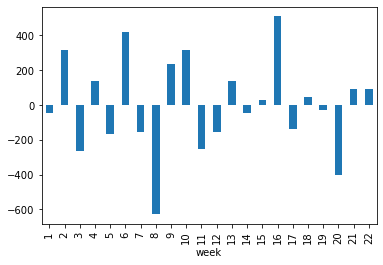

In [76]:
# Week by week return 
test_with_lines.groupby(by='week').sum()['algo_return'].plot.bar()

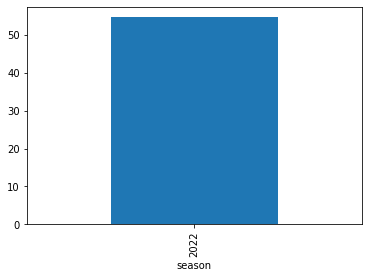

In [77]:
# Season by season return 
test_with_lines.groupby(by='season').sum()['algo_return'].plot.bar()

In [78]:
test_with_lines[test_with_lines.week == 9]

Unnamed: 0        date  season  week season_type  \
2218        2247  2022-11-03    2022     9         REG   
2219        2248  2022-11-06    2022     9         REG   
2220        2249  2022-11-06    2022     9         REG   
2221        2250  2022-11-06    2022     9         REG   
2222        2251  2022-11-06    2022     9         REG   
2223        2252  2022-11-06    2022     9         REG   
2224        2253  2022-11-06    2022     9         REG   
2225        2254  2022-11-06    2022     9         REG   
2227        2256  2022-11-06    2022     9         REG   
2228        2257  2022-11-06    2022     9         REG   
2230        2259  2022-11-07    2022     9         REG   

                          home                  away  home_score_x  \
2218            Houston Texans   Philadelphia Eagles            17   
2219             Chicago Bears        Miami Dolphins            32   
2220  Washington Football Team     Minnesota Vikings            17   
2221             New York Jets         Buffalo Bills            20   
2222      New England Patriots    Indianapolis Colts            26   
2223             Detroit Lions     Green Bay Packers            15   
2224           Atlanta Falcons  Los Angeles Chargers            17   
2225      Jacksonville Jaguars     Las Vegas Raiders            27   
2227         Arizona Cardinals      Seattle Seahawks            21   
2228      Tampa Bay Buccaneers      Los Angeles Rams            16   
2230        New Orleans Saints      Baltimore Ravens            13   

      away_score_x          home_qb           away_qb  qb_adjusted_value_home  \
2218            29      Davis Mills       Jalen Hurts               -0.708613   
2219            35    Justin Fields    Tua Tagovailoa               -0.026177   
2220            20  Taylor Heinicke      Kirk Cousins               -0.970609   
2221            17      Zach Wilson        Josh Allen               -0.597886   
2222             3        Mac Jones      Sam Ehlinger               -0.072174   
2223             9       Jared Goff     Aaron Rodgers               -0.221197   
2224            20   Marcus Mariota    Justin Herbert                0.276200   
2225            20  Trevor Lawrence        Derek Carr               -0.188552   
2227            31     Kyler Murray        Geno Smith               -0.299139   
2228            13        Tom Brady  Matthew Stafford                0.193196   
2230            27      Andy Dalton     Lamar Jackson                0.140885   

      rushing_adjusted_value_home  qb_rushing_value_pct_home  \
2218                     0.168417                        0.0   
2219                     1.143613                        0.0   
2220                     0.303231                        0.0   
2221                     0.301736                        0.0   
2222                     0.290364                        0.0   
2223                    -0.233209                        0.0   
2224                     0.636075                        0.0   
2225                     0.494365                        0.0   
2227                     0.175020                        0.0   
2228                    -0.587659                        0.0   
2230                     0.680302                        0.0   

      qb_def_adjusted_value_home  rush_def_adjusted_value_home  \
2218                   -0.020388                     -0.615766   
2219                   -0.201529                     -0.786990   
2220                    0.179304                      0.662236   
2221                    0.598046                      0.681106   
2222                    0.383629                     -0.163666   
2223                   -0.921245                     -0.556188   
2224                   -0.802458                     -0.303832   
2225                   -0.065027                     -0.558166   
2227                    0.249338                      0.144742   
2228                   -0.321018                     -0.607354   


In [79]:
# Should move these to helper functions later

def get_algo_returns_over(game, threshold):
    if game.over_advantage < threshold:
        return 0 
    
    else:
        return game.over_return
    
def get_algo_returns_under(game, threshold):
    if game.under_advantage < threshold:
        return 0 
    
    else:
        return game.under_return
    
threshold = threshold_var

test_with_lines['algo_return_overs'] = test_with_lines.apply(lambda x: get_algo_returns_over(x, threshold), axis=1)
test_with_lines['algo_return_unders'] = test_with_lines.apply(lambda x: get_algo_returns_under(x, threshold), axis=1)
test_with_lines

Unnamed: 0        date  season  week season_type                 home  \
2097        2124  2022-09-08    2022     1         REG     Los Angeles Rams   
2098        2125  2022-09-11    2022     1         REG       Miami Dolphins   
2101        2128  2022-09-11    2022     1         REG        New York Jets   
2104        2131  2022-09-11    2022     1         REG        Detroit Lions   
2105        2132  2022-09-11    2022     1         REG        Chicago Bears   
...          ...         ...     ...   ...         ...                  ...   
2371        2401  2023-01-21    2022    20        POST  Philadelphia Eagles   
2372        2402  2023-01-22    2022    20        POST        Buffalo Bills   
2373        2403  2023-01-22    2022    20        POST  San Francisco 49ers   
2375        2405  2023-01-29    2022    21        POST   Kansas City Chiefs   
2376        2406  2023-02-12    2022    22        POST  Philadelphia Eagles   

                      away  home_score_x  away_score_x           home_qb  \
2097         Buffalo Bills            10            31  Matthew Stafford   
2098  New England Patriots            20             7    Tua Tagovailoa   
2101      Baltimore Ravens             9            24        Joe Flacco   
2104   Philadelphia Eagles            35            38        Jared Goff   
2105   San Francisco 49ers            19            10     Justin Fields   
...                    ...           ...           ...               ...   
2371       New York Giants            38             7       Jalen Hurts   
2372    Cincinnati Bengals            10            27        Josh Allen   
2373        Dallas Cowboys            19            12       Brock Purdy   
2375    Cincinnati Bengals            23            20   Patrick Mahomes   
2376    Kansas City Chiefs            35            38       Jalen Hurts   

              away_qb  qb_adjusted_value_home  rushing_adjusted_value_home  \
2097       Josh Allen                0.846672                    -1.526921   
2098        Mac Jones               -0.247191                    -0.441563   
2101    Lamar Jackson               -0.427333                    -0.134352   
2104      Jalen Hurts               -0.156866                    -0.552323   
2105       Trey Lance               -0.562550                     0.274953   
...               ...                     ...                          ...   
2371     Daniel Jones                0.690447                     1.920561   
2372       Joe Burrow                0.285539                     0.625543   
2373     Dak Prescott                0.764975                     0.633274   
2375       Joe Burrow                0.626274                     0.390027   
2376  Patrick Mahomes                0.579982                     1.844241   

      qb_rushing_value_pct_home  qb_def_adjusted_value_home  \
2097                        0.0                    0.659332   
2098                        0.0                    0.815666   
2101                        0.0                   -0.622903   
2104                        0.0                   -0.068564   
2105                        0.0                    0.275204   
...                         ...                         ...   
2371                        0.0                    0.348960   
2372                        0.0                    0.660321   
2373                        0.0                    0.686924   
2375                        0.0                    0.641969   
2376                        0.0                    0.614928   

      rush_def_adjusted_value_home  special_teams_value_home  \
2097                      0.013114                  0.062338   
2098                     -0.619903                 -0.147288   
2101                     -0.379120                  0.396428   
2104                     -0.823399                  0.029035   
2105                     -0.295882                  0.651611   
...                            ...                       ...   
23

In [65]:
# Look at outcomes by home, away, favorite, underdog, etc.

test_pivoted = test_with_lines.copy().reset_index()
test_pivoted = test_pivoted.groupby(by='week').sum().reset_index()
test_pivoted = pd.melt(test_pivoted, id_vars = ['week'],
              value_vars=['algo_return_overs', 'algo_return_unders'],
             var_name='algo_return_type', value_name='return')
test_pivoted

week    algo_return_type  return
0      1   algo_return_overs    0.00
1      2   algo_return_overs -100.00
2      3   algo_return_overs    0.00
3      4   algo_return_overs   -9.09
4      5   algo_return_overs -100.00
5      6   algo_return_overs    0.00
6      7   algo_return_overs    0.00
7      8   algo_return_overs -100.00
8      9   algo_return_overs    0.00
9     10   algo_return_overs    0.00
10    11   algo_return_overs    0.00
11    12   algo_return_overs    0.00
12    13   algo_return_overs    0.00
13    14   algo_return_overs -100.00
14    15   algo_return_overs   90.91
15    16   algo_return_overs    0.00
16    17   algo_return_overs    0.00
17    18   algo_return_overs   90.91
18    19   algo_return_overs    0.00
19    20   algo_return_overs -100.00
20    21   algo_return_overs    0.00
21    22   algo_return_overs    0.00
22     1  algo_return_unders   -9.09
23     2  algo_return_unders  172.73
24     3  algo_return_unders -209.09
25     4  algo_return_unders -100.00
26     5  algo_return_unders   90.91
27     6  algo_return_unders   81.82
28     7  algo_return_unders   -9.09
29     8  algo_return_unders -100.00
30     9  algo_return_unders  272.73
31    10  algo_return_unders  363.64
32    11  algo_return_unders -109.09
33    12  algo_return_unders -300.00
34    13  algo_return_unders   -9.09
35    14  algo_return_unders -100.00
36    15  algo_return_unders   -9.09
37    16  algo_return_unders  181.82
38    17  algo_return_unders   -9.09
39    18  algo_return_unders   90.91
40    19  algo_return_unders -100.00
41    20  algo_return_unders    0.00
42    21  algo_return_unders    0.00
43    22  algo_return_unders    0.00

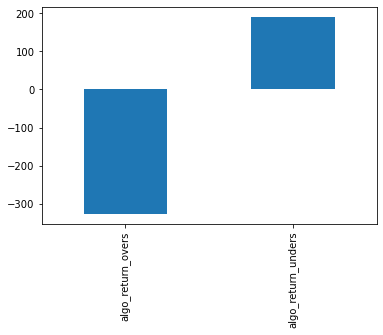

In [66]:
test_with_lines.sum()[['algo_return_overs', 'algo_return_unders']].plot.bar()

In [67]:
# Week by week return 

fig = px.bar(test_pivoted, x="week", y="return", color='algo_return_type')
fig.show()

In [68]:
# Get accuracies 

def get_algo_acc(game, column):
    if game[column] > 0:
        return 1
    elif game[column] < 0:
        return 0 
    else:
        return None

test_with_lines['algo_overs_acc'] = test_with_lines.apply(lambda x: get_algo_acc(x, 'algo_return_overs'), axis=1)
test_with_lines['algo_unders_acc'] = test_with_lines.apply(lambda x: get_algo_acc(x, 'algo_return_unders'), axis=1)
test_with_lines

Unnamed: 0        date  season  week season_type                 home  \
2097        2124  2022-09-08    2022     1         REG     Los Angeles Rams   
2098        2125  2022-09-11    2022     1         REG       Miami Dolphins   
2101        2128  2022-09-11    2022     1         REG        New York Jets   
2104        2131  2022-09-11    2022     1         REG        Detroit Lions   
2105        2132  2022-09-11    2022     1         REG        Chicago Bears   
...          ...         ...     ...   ...         ...                  ...   
2371        2401  2023-01-21    2022    20        POST  Philadelphia Eagles   
2372        2402  2023-01-22    2022    20        POST        Buffalo Bills   
2373        2403  2023-01-22    2022    20        POST  San Francisco 49ers   
2375        2405  2023-01-29    2022    21        POST   Kansas City Chiefs   
2376        2406  2023-02-12    2022    22        POST  Philadelphia Eagles   

                      away  home_score_x  away_score_x           home_qb  \
2097         Buffalo Bills            10            31  Matthew Stafford   
2098  New England Patriots            20             7    Tua Tagovailoa   
2101      Baltimore Ravens             9            24        Joe Flacco   
2104   Philadelphia Eagles            35            38        Jared Goff   
2105   San Francisco 49ers            19            10     Justin Fields   
...                    ...           ...           ...               ...   
2371       New York Giants            38             7       Jalen Hurts   
2372    Cincinnati Bengals            10            27        Josh Allen   
2373        Dallas Cowboys            19            12       Brock Purdy   
2375    Cincinnati Bengals            23            20   Patrick Mahomes   
2376    Kansas City Chiefs            35            38       Jalen Hurts   

              away_qb  qb_adjusted_value_home  rushing_adjusted_value_home  \
2097       Josh Allen                0.846672                    -1.526921   
2098        Mac Jones               -0.247191                    -0.441563   
2101    Lamar Jackson               -0.427333                    -0.134352   
2104      Jalen Hurts               -0.156866                    -0.552323   
2105       Trey Lance               -0.562550                     0.274953   
...               ...                     ...                          ...   
2371     Daniel Jones                0.690447                     1.920561   
2372       Joe Burrow                0.285539                     0.625543   
2373     Dak Prescott                0.764975                     0.633274   
2375       Joe Burrow                0.626274                     0.390027   
2376  Patrick Mahomes                0.579982                     1.844241   

      qb_rushing_value_pct_home  qb_def_adjusted_value_home  \
2097                        0.0                    0.659332   
2098                        0.0                    0.815666   
2101                        0.0                   -0.622903   
2104                        0.0                   -0.068564   
2105                        0.0                    0.275204   
...                         ...                         ...   
2371                        0.0                    0.348960   
2372                        0.0                    0.660321   
2373                        0.0                    0.686924   
2375                        0.0                    0.641969   
2376                        0.0                    0.614928   

      rush_def_adjusted_value_home  special_teams_value_home  \
2097                      0.013114                  0.062338   
2098                     -0.619903                 -0.147288   
2101                     -0.379120                  0.396428   
2104                     -0.823399                  0.029035   
2105                     -0.295882                  0.651611   
...                            ...                       ...   
23

In [69]:
accs = test_with_lines.groupby(by='week').agg(
    algo_over_correct = ('algo_overs_acc', 'sum'),
    algo_over_total = ('algo_overs_acc', 'count'),
    algo_under_correct = ('algo_unders_acc', 'sum'),
    algo_under_total = ('algo_unders_acc', 'count'),
)

accs['algo_overs_acc'] = accs.algo_over_correct/accs.algo_over_total
accs['algo_away_acc'] = accs.algo_under_correct/accs.algo_under_total

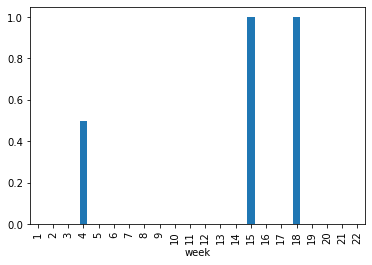

In [70]:
check_col = 'algo_overs_acc'
accs[check_col].plot.bar()

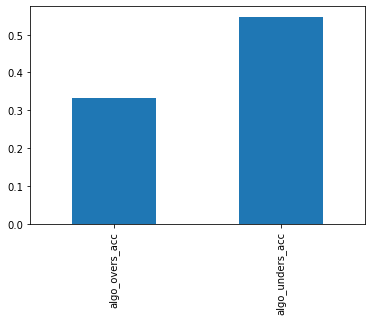

In [71]:
accs2 = test_with_lines.agg(['sum','count']).transpose().loc[['algo_overs_acc', 'algo_unders_acc']]
accs2['accuracy'] = accs2['sum']/accs2['count']
accs2.accuracy.plot.bar()

In [72]:
# Total bet counts

len(test_with_lines[test_with_lines.algo_return != 0])

51

In [47]:
test_with_lines[test_with_lines.algo_return!=0][['date', 'week', 'home_team', 'away_team', 'home_score_x', 'away_score_x', 'algo_return', 'over_advantage', 'under_advantage']]

date  week            home_team             away_team  \
2097  2022-09-08     1     Los Angeles Rams         Buffalo Bills   
2098  2022-09-11     1       Miami Dolphins  New England Patriots   
2101  2022-09-11     1        New York Jets      Baltimore Ravens   
2104  2022-09-11     1        Detroit Lions   Philadelphia Eagles   
2105  2022-09-11     1        Chicago Bears   San Francisco 49ers   
...          ...   ...                  ...                   ...   
2371  2023-01-21    20  Philadelphia Eagles       New York Giants   
2372  2023-01-22    20        Buffalo Bills    Cincinnati Bengals   
2373  2023-01-22    20  San Francisco 49ers        Dallas Cowboys   
2375  2023-01-29    21   Kansas City Chiefs    Cincinnati Bengals   
2376  2023-02-12    22  Philadelphia Eagles    Kansas City Chiefs   

      home_score_x  away_score_x  algo_return  over_advantage  under_advantage  
2097            10            31      -100.00        0.005867        -0.005867  
2098            20             7        90.91       -0.048802         0.048802  
2101             9            24        90.91       -0.086933         0.086933  
2104            35            38      -100.00       -0.064482         0.064482  
2105            19            10      -100.00        0.014620        -0.014620  
...            ...           ...          ...             ...              ...  
2371            38             7      -100.00        0.011487        -0.011487  
2372            10            27      -100.00        0.037990        -0.037990  
2373            19            12      -100.00        0.060081        -0.060081  
2375            23            20        90.91       -0.024947         0.024947  
2376            35            38        90.91        0.047345        -0.047345  

[240 rows x 9 columns]

In [ ]:
# NOTE

do some eda, maybe 6 games isnt the best number
maybe would be good to use previous season data for the early weeks as well
can look at autocorrelation? see how the correlation between stats changes the farther the number of games is
may find that after 4 or 5 games the correlation gets very small, or maybe the opposite